In [2]:
import sys
sys.path.append("../..")
import sl_inference_only_muDMalpha as sl

In [3]:
from sl_inference_only_muDMalpha.mock_generator.mock_generator import run_mock_simulation

In [4]:
mock = run_mock_simulation(10000, if_source=True)  

Processing lenses: 100%|██████████| 10000/10000 [00:34<00:00, 288.26it/s]


In [5]:
df_lens, mock_lens_data, mock_observed_data = mock

In [6]:
# df_lens

In [7]:
mock_lens_data

,xA,xB,beta,kappaA,kappaB,gammaA,gammaB,magnificationA,magnificationB,kappa_starA,...,maximum_magnitude,beta_unit,logalpha_sps,logM_star,logM_star_sps,logM_star_sps_observed,logM_halo,logRe,zl,zs
3,4.467725,-4.198117,0.045077,0.409365,0.446075,0.556069,0.590723,25.225351,23.745686,0.281483,...,26.5,0.045077,0.1,11.545403,11.445403,11.425547,11.642435,0.942799,0.3,2.0
4,56.470506,-17.366530,0.707464,0.159644,1.080129,0.387738,1.391665,1.799016,0.518063,0.000611,...,26.5,0.707464,0.1,11.634185,11.534185,11.537458,13.476437,0.734077,0.3,2.0
5,15.491170,-7.284695,0.542768,0.295210,0.805190,0.416676,0.807523,3.094890,1.628369,0.024256,...,26.5,0.542768,0.1,11.538876,11.438876,11.467810,12.730324,0.829809,0.3,2.0
12,24.179536,-10.620926,0.610728,0.263756,0.849933,0.420295,0.869379,2.736649,1.363751,0.005858,...,26.5,0.610728,0.1,11.427960,11.327960,11.249831,13.026042,0.794294,0.3,2.0
24,20.962925,-13.082984,0.364580,0.312265,0.618316,0.472525,0.726532,4.004755,2.616764,0.013328,...,26.5,0.364580,0.1,11.571797,11.471797,11.608076,12.992554,0.887457,0.3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,12.075096,-7.385495,0.380859,0.350531,0.664801,0.443365,0.672198,4.439665,2.945759,0.046092,...,26.5,0.380859,0.1,11.555693,11.455693,11.594454,12.624114,0.920811,0.3,2.0
9985,11.980262,-6.106321,0.519180,0.351414,0.793983,0.404679,0.684585,3.892505,2.346419,0.015411,...,26.5,0.519180,0.1,11.153762,11.053762,11.032982,12.668126,0.634052,0.3,2.0
9989,16.003651,-8.660939,0.403711,0.308045,0.699033,0.436724,0.772605,3.471290,1.975060,0.010064,...,26.5,0.403711,0.1,11.376839,11.276839,11.212886,12.799627,0.520612,0.3,2.0
9996,23.324376,-7.619965,0.724761,0.236992,1.093526,0.386373,1.059372,2.310009,0.898098,0.004637,...,26.5,0.724761,0.1,11.434715,11.334715,11.155090,12.947721,0.609764,0.3,2.0


In [8]:
# mock_observed_data

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

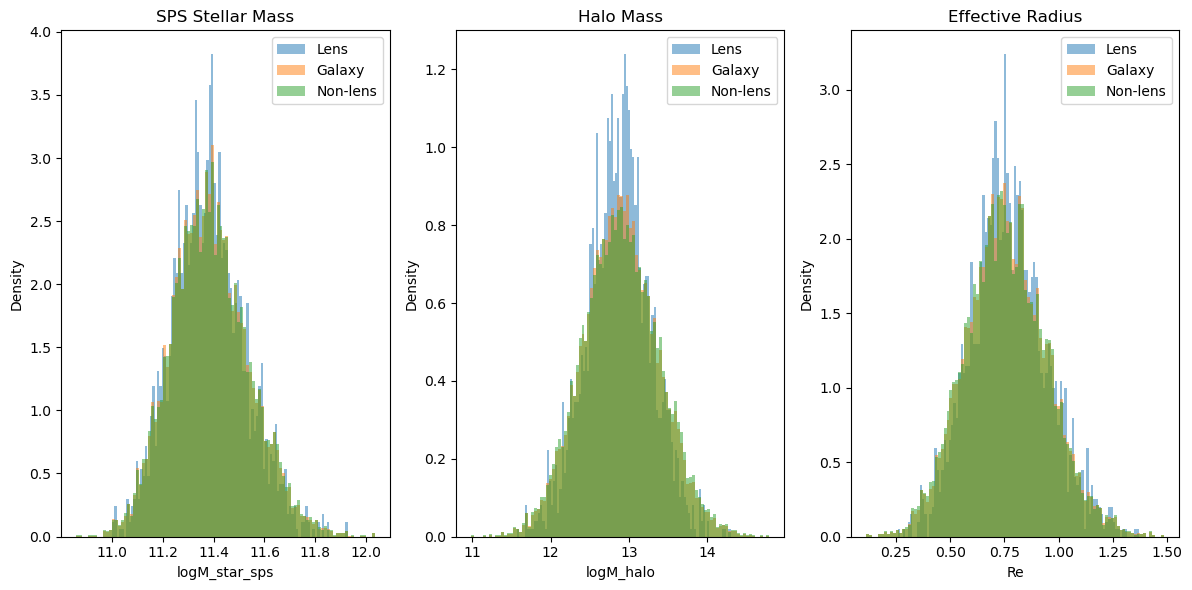

In [25]:
M_sps_lens = mock_lens_data["logM_star_sps"]
M_sps_galaxy = df_lens["logM_star_sps"]
M_sps_nonlens = nonlens["logM_star_sps"]

M_halo_lens = mock_lens_data["logM_halo"]
M_halo_galaxy = df_lens["logM_halo"]
M_halo_nonlens = nonlens["logM_halo"]


Re = mock_lens_data["logRe"]
Re_galaxy = df_lens["logRe"]
Re_nonlens = nonlens["logRe"]


fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# hist compare
axes[0].hist(M_sps_lens, bins=100, alpha=0.5, label='Lens', density=True)
axes[0].hist(M_sps_galaxy, bins=100, alpha=0.5, label='Galaxy', density=True)
axes[0].hist(M_sps_nonlens, bins=100, alpha=0.5, label='Non-lens', density=True)
axes[0].set_xlabel('logM_star_sps')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].set_title('SPS Stellar Mass')

axes[1].hist(M_halo_lens, bins=100, alpha=0.5, label='Lens', density=True)
axes[1].hist(M_halo_galaxy, bins=100, alpha=0.5, label='Galaxy', density=True)
axes[1].hist(M_halo_nonlens, bins=100, alpha=0.5, label='Non-lens', density=True)
axes[1].set_xlabel('logM_halo')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].set_title('Halo Mass')

axes[2].hist(Re, bins=100, alpha=0.5, label='Lens', density=True)
axes[2].hist(Re_galaxy, bins=100, alpha=0.5, label='Galaxy', density=True)
axes[2].hist(Re_nonlens, bins=100, alpha=0.5, label='Non-lens', density=True)
axes[2].set_xlabel('Re')
axes[2].set_ylabel('Density')
axes[2].legend()
axes[2].set_title('Effective Radius')

plt.tight_layout()
plt.show()

In [24]:
nonlens = df_lens[df_lens["is_lensed"] == 0]